#  A Whale off the Port(folio)
 ---

This note book uses data analysis of stock prices using Pandas to evaluate the performance of various algorithmic, hedge fund, and mutual fund portfolios and compare their performance against the S&P 500 Index. 
We will also construct a custom portfolio, compute weighted return of the portfolio and run different type of risk analysis with the portfolio.
 
Following concepts are used (a) data preparation using data cleansing, indexing, sorting, rearranging columns and merging data frames and (b) quantitative analysis by computing and ploting cummulative returns, daily standard deviation, annualized standard deviation, rolling standard deviation, correlation, covariance wrt S&P 500 returns, variance of S&P 500 returns, BETA and Sharpe ratio

In [5]:
# import libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, we will read the CSV files into DataFrames and perform  necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

**_Files_**

 * `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

 * `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

 * `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns
Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns with 'Date' as index and sort the Date just to make sure dates are ordered

whale_daily_returns_path = Path("../Resources/whale_returns.csv")
whale_daily_returns = pd.read_csv(whale_daily_returns_path, index_col='Date', parse_dates=True,infer_datetime_format=True)
whale_daily_returns = whale_daily_returns.sort_index() 

# Inspect some data
whale_daily_returns.sample(4)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2017-11-02,-0.001080,-0.022453,0.003270,0.006420
2018-02-13,0.000000,0.000000,0.000000,0.000000
2016-11-21,0.002668,0.005355,0.012122,0.002315
2015-06-22,0.006302,0.002397,0.003601,0.001921


In [7]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls if any and re-check nulls

whale_daily_returns = whale_daily_returns.dropna()
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns with 'Date' as index and sort the Date just to make sure dates are ordered
algo_daily_returns_path = Path("../Resources/algo_returns.csv")
algo_daily_returns = pd.read_csv(algo_daily_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_daily_returns = algo_daily_returns.sort_index()

# Inspect some data
algo_daily_returns.sample(4)

,Algo 1,Algo 2
Date,,
2016-03-09,0.001953,0.007020
2019-02-11,-0.002686,0.004898
2015-10-16,0.006359,-0.003778
2018-08-21,0.002226,0.004600


In [10]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls and re-check for nulls

algo_daily_returns = algo_daily_returns.dropna()
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [12]:
# Reading S&P 500 Closing Prices with 'Date' as index
sp500_daily_close_path = Path("../Resources/sp500_history.csv")
sp500_daily_close = pd.read_csv(sp500_daily_close_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [13]:
# Check Data Types
sp500_daily_close.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types of "Close" to float

sp500_daily_close["Close"] = sp500_daily_close["Close"].str.replace("$", "")
sp500_daily_close["Close"] = sp500_daily_close["Close"].astype("float")

# Display datatype
sp500_daily_close.dtypes

<ipython-input-14-4848611d209f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_daily_close["Close"] = sp500_daily_close["Close"].str.replace("$", "")


Close    float64
dtype: object

In [15]:
# Sort on index to make sure closing prices are sorted based on Date
sp500_daily_close = sp500_daily_close.sort_index()

# Inspect few records
sp500_daily_close.sample(4)

,Close
Date,
2017-06-19,2453.46
2015-01-12,2028.26
2015-07-28,2093.25
2019-04-16,2907.06


In [16]:
# Calculate Daily Returns from given daily closing prices of S&P 500
sp500_daily_returns = sp500_daily_close.pct_change()
sp500_daily_returns.sample(4)

,Close
Date,
2013-07-30,0.000374
2014-05-22,0.002362
2017-02-27,0.001018
2016-04-15,-0.000984


In [17]:
# Drop nulls and re-check for nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [18]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_returns = sp500_daily_returns.rename(columns={'Close':'SP500'})
sp500_daily_returns.sample(2)

,SP500
Date,
2017-03-28,0.007251
2014-07-14,0.004844


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale daily returns, Algorithmic daily returns, and the S&P 500 daily returns into a single DataFrame 
# with columns for each portfolio.

all_portfolio_daily_returns = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')
all_portfolio_daily_returns = all_portfolio_daily_returns.sort_index()

# inspect few records
all_portfolio_daily_returns.sample(4)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2018-12-07,-0.019902,-0.012730,-0.022698,-0.024372,0.003690,-0.015535,-0.023320
2016-09-09,-0.016075,-0.012261,-0.032441,-0.017431,-0.000277,-0.024699,-0.024522
2016-10-27,-0.008157,-0.002569,-0.004231,-0.008931,0.000576,-0.005798,-0.002987
2016-06-15,0.003305,-0.006720,-0.000709,-0.005166,-0.001871,0.002348,-0.001841


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

<AxesSubplot:xlabel='Date'>

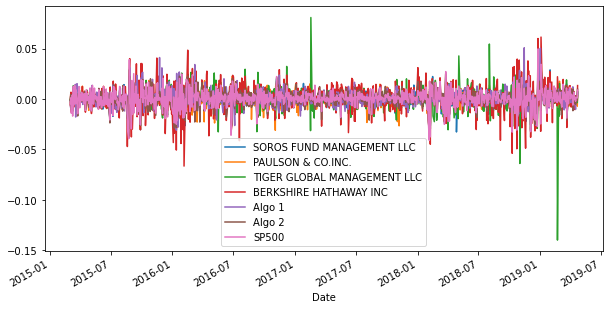

In [20]:
# Plot daily returns of all portfolios
all_portfolio_daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

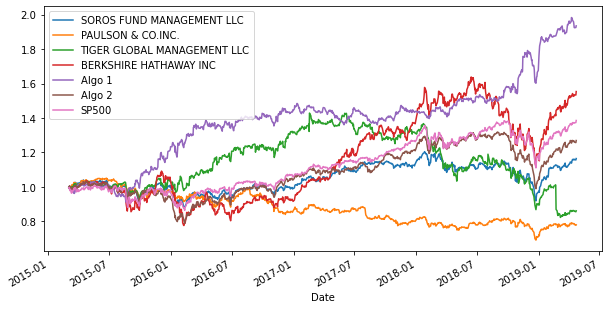

In [21]:
# Calculate cumulative returns of all portfolios
all_portfolio_cumulative_returns = (1 + all_portfolio_daily_returns).cumprod()

# Plot cumulative returns
all_portfolio_cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

<AxesSubplot:>

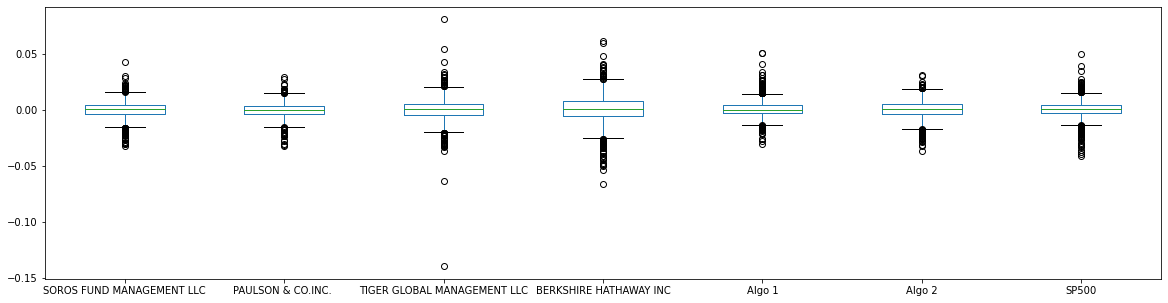

In [22]:
# Box plot to visually show risk
all_portfolio_daily_returns.plot.box(figsize=(20,5))

### Calculate Standard Deviations

In [23]:
# Calculate standard deviations of each portfolio
all_portfolio_daily_std = all_portfolio_daily_returns.std().sort_values(ascending=False)
all_portfolio_daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

**Following portfolios are riskier than the S&P 500 because they have greater standard deviation than S&P500**
 
1. BERKSHIRE HATHAWAY INC 
2. TIGER GLOBAL MANAGEMENT LLC

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate annualized standard deviations of each portfolio
all_portfolio_annualized_std = all_portfolio_daily_std * np.sqrt(252)
all_portfolio_annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [25]:
# Calculate 21-day rolling standard deviations of each portfolio
all_portfolio_rolling_std = all_portfolio_daily_returns.rolling(window=21).std()
all_portfolio_rolling_std.sample(4)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-12-31,0.008031,0.005562,0.013389,0.013987,0.009860,0.009798,0.011597
2015-08-18,0.005858,0.004924,0.004449,0.007240,0.006742,0.006808,0.006341
2018-09-24,0.005177,0.004251,0.009057,0.012988,0.005893,0.003560,0.004104
2017-10-19,0.002937,0.005755,0.005848,0.008211,0.003622,0.004083,0.002223


<AxesSubplot:xlabel='Date'>

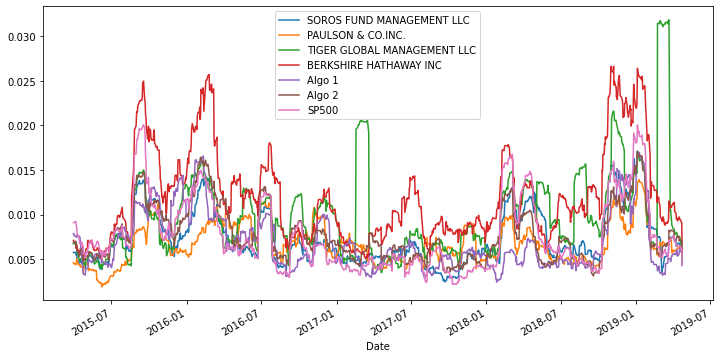

In [26]:
# visualize 21-day rolling standard deviations of all portfolios
all_portfolio_rolling_std.plot(figsize=(12,6))

### Calculate and plot the correlation

<AxesSubplot:>

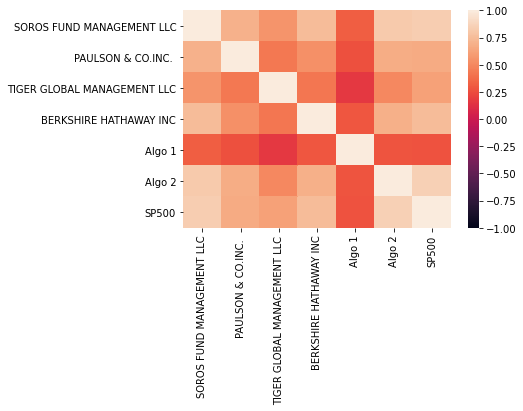

In [27]:
# Calculate the correlation
all_portfolio_corr = all_portfolio_daily_returns.corr()
sns.heatmap(all_portfolio_corr, vmin=-1, vmax=1)

**Algo 2 is 85.9% and SOROS Fund is 83.8% correlated with S&P 500. These two portfolios may mimick the S&P 500.**

In [28]:
# Display de correlation matrix
all_portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [29]:
# Calculate covariance of individual portfolio
# iloc[:,n] slices all rows for (n+1)th column in the dataframe. Index col. is the 0th col.  

Soros_covariance = all_portfolio_daily_returns.iloc[:,0].cov(all_portfolio_daily_returns['SP500'])
Paulson_covariance = all_portfolio_daily_returns.iloc[:,1].cov(all_portfolio_daily_returns['SP500'])
Tiger_covariance = all_portfolio_daily_returns.iloc[:,2].cov(all_portfolio_daily_returns['SP500'])
Berkshire_covariance = all_portfolio_daily_returns.iloc[:,3].cov(all_portfolio_daily_returns['SP500'])
Algo1_covariance = all_portfolio_daily_returns.iloc[:,4].cov(all_portfolio_daily_returns['SP500'])
Algo2_covariance = all_portfolio_daily_returns.iloc[:,5].cov(all_portfolio_daily_returns['SP500'])

In [30]:
# Calculate variance of S&P 500
SP500_variance = all_portfolio_daily_returns['SP500'].var()

In [31]:
# Computing and round beta of individual portfolio
Soros_beta = Soros_covariance / SP500_variance
Soros_beta_rounded = round(Soros_beta,2)

Paulson_beta = Paulson_covariance / SP500_variance
Paulson_beta_rounded = round(Paulson_beta,2)

Tiger_beta = Tiger_covariance / SP500_variance
Tiger_beta_rounded = round(Tiger_beta,2)

Berkshire_beta = Berkshire_covariance / SP500_variance
Berkshire_beta_rounded = round(Berkshire_beta,2)

Algo1_beta = Algo1_covariance / SP500_variance
Algo1_beta_rounded = round(Algo1_beta,2)

Algo2_beta = Algo2_covariance / SP500_variance
Algo2_beta_rounded = round(Algo2_beta,2)

In [32]:
# Print portfolio beta
print(f"---------------------------------------- Portfolio beta ------------------------------------------")
print(f"SOROS FUND MANAGEMENT LLC:   {Soros_beta_rounded}    PAULSON & CO.INC:       {Paulson_beta_rounded}")  
print(f"TIGER GLOBAL MANAGEMENT LLC: {Tiger_beta_rounded}    BERKSHIRE HATHAWAY INC: {Berkshire_beta_rounded}")
print(f"Algo 1:                      {Algo1_beta_rounded}    Algo 2:                 {Algo2_beta_rounded}")

---------------------------------------- Portfolio beta ------------------------------------------
SOROS FUND MANAGEMENT LLC:   0.77    PAULSON & CO.INC:       0.55
TIGER GLOBAL MANAGEMENT LLC: 0.79    BERKSHIRE HATHAWAY INC: 1.13
Algo 1:                      0.25    Algo 2:                 0.84


## Plot beta trend

In [33]:
# Calculate 30-day rolloing covariance of individual portfolio

Soros_rolling_covariance = all_portfolio_daily_returns.iloc[:,0].rolling(window=30).cov(all_portfolio_daily_returns['SP500'])
Paulson_rolling_covariance = all_portfolio_daily_returns.iloc[:,1].rolling(window=30).cov(all_portfolio_daily_returns['SP500'])
Tiger_rolling_covariance = all_portfolio_daily_returns.iloc[:,2].rolling(window=30).cov(all_portfolio_daily_returns['SP500'])
Berkshire_rolling_covariance = all_portfolio_daily_returns.iloc[:,3].rolling(window=30).cov(all_portfolio_daily_returns['SP500'])
Algo1_rolling_covariance = all_portfolio_daily_returns.iloc[:,4].rolling(window=30).cov(all_portfolio_daily_returns['SP500'])
Algo2_rolling_covariance = all_portfolio_daily_returns.iloc[:,5].rolling(window=30).cov(all_portfolio_daily_returns['SP500'])

In [34]:
# Calculate  30-day rolloing rolling variance of S&P 500
SP500_rolling_variance = all_portfolio_daily_returns['SP500'].rolling(window=30).var()

In [35]:
# Calculate 30-day rolling beta of individual portfolio

Soros_rolling_beta = Soros_rolling_covariance / SP500_rolling_variance
Paulson_rolling_beta = Paulson_rolling_covariance / SP500_rolling_variance
Tiger_rolling_beta = Tiger_rolling_covariance / SP500_rolling_variance
Berkshire_rolling_beta = Berkshire_rolling_covariance / SP500_rolling_variance
Algo1_rolling_beta = Algo1_rolling_covariance / SP500_rolling_variance
Algo2_rolling_beta = Algo2_rolling_covariance / SP500_rolling_variance

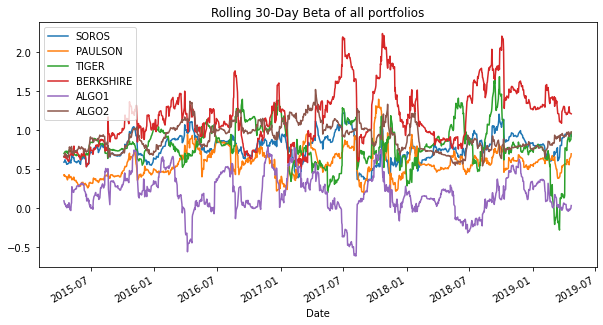

In [36]:
# Visualize beta trend of all portfolios

ax = Soros_rolling_beta.plot(figsize=(10, 5), title='Rolling 30-Day Beta of all portfolios')
Paulson_rolling_beta.plot(ax=ax)
Tiger_rolling_beta.plot(ax=ax)
Berkshire_rolling_beta.plot(ax=ax)
Algo1_rolling_beta.plot(ax=ax)
Algo2_rolling_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["SOROS", "PAULSON", "TIGER", "BERKSHIRE","ALGO1","ALGO2"]);

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

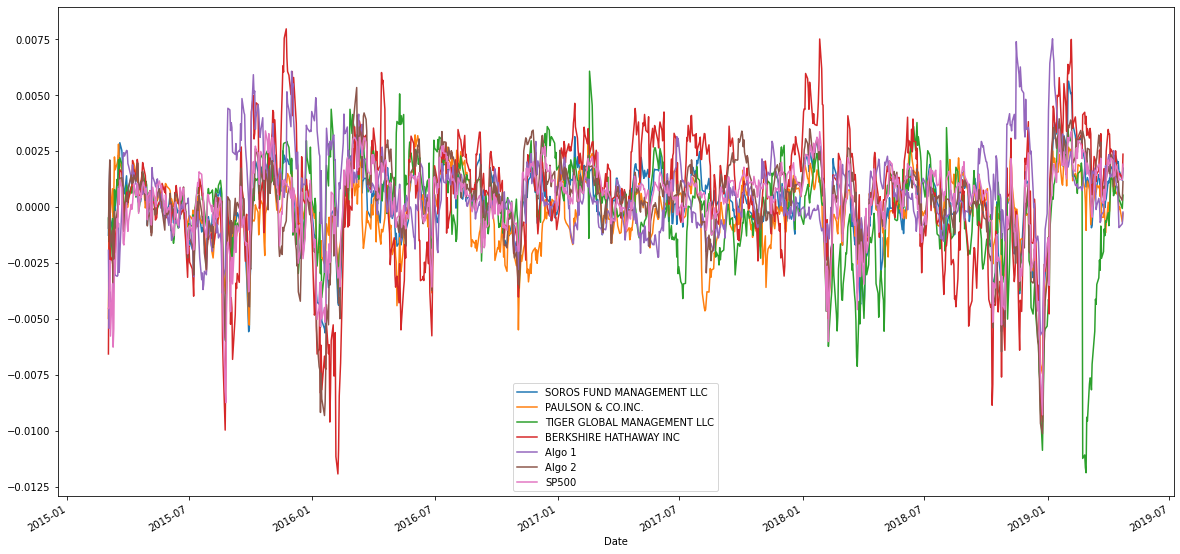

In [37]:
# Use `ewm` to calculate the rolling window
all_portfolio_daily_returns.ewm(span=21).mean().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Read risk-free rates needed to calculate Sharpe ratio
risk_free_return_rates_path = Path('../Resources/risk_free_rate.csv')
risk_free_return_rates = pd.read_csv(risk_free_return_rates_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
risk_free_return_rates.sample(4)

,rf_rate
Date,
1959-02-20,0.000287
1973-05-08,0.000669
1963-05-28,0.000330
1977-09-16,0.000651


In [39]:
# concat to take same date ranges 
all_portfolios_and_rf_returns = pd.concat([all_portfolio_daily_returns, risk_free_return_rates], axis = 'columns', join = 'inner')
all_portfolios_and_rf_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,rf_rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000002


In [40]:
# Annualized Sharpe Ratios
all_portfolio_sharpe_ratios = ((all_portfolios_and_rf_returns.mean() - all_portfolios_and_rf_returns['rf_rate'].mean()) * 252) / (all_portfolios_and_rf_returns.std() * np.sqrt(252))
all_portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.203632
PAULSON & CO.INC.             -0.703093
TIGER GLOBAL MANAGEMENT LLC   -0.280734
BERKSHIRE HATHAWAY INC         0.521263
Algo 1                         1.147535
Algo 2                         0.314133
SP500                          0.492225
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

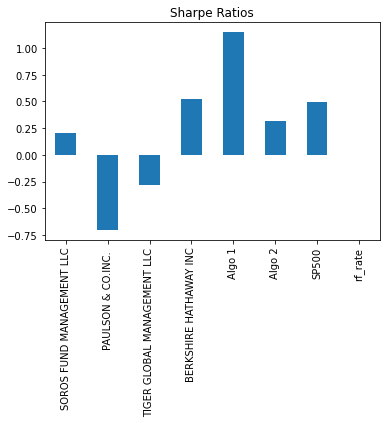

In [41]:
# Visualize the sharpe ratios as a bar plot
all_portfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

* The higher a fund's Sharpe ratio, the better a fund's returns have been relative to the risk it has taken on.
"Algo 1" portfolio is having the highest sharpe-ratio and outperformed S&P 500. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [42]:
# Reading data from 1st stock - Google
Goog_closing_prices_path = Path('../Resources/goog_historical.csv')
Goog_closing_prices = pd.read_csv(Goog_closing_prices_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
Goog_closing_prices.drop(columns=['Symbol'],inplace=True)
Goog_closing_prices.sample(4)

,NOCP
Trade DATE,
2019-05-08,1166.27
2018-09-07,1164.83
2018-09-10,1164.64
2018-12-03,1106.43


In [43]:
# Reading data from 2nd stock - Apple
Appl_closing_prices_path = Path('../Resources/aapl_historical.csv')
Appl_closing_prices = pd.read_csv(Appl_closing_prices_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
Appl_closing_prices.drop(columns=['Symbol'],inplace=True)
Appl_closing_prices.sample(4)

,NOCP
Trade DATE,
2018-06-01,190.24
2018-07-23,191.61
2018-10-31,218.86
2018-07-13,191.33


In [44]:
# Reading data from 3rd stock - Costco
Cost_closing_prices_path = Path('../Resources/cost_historical.csv')
Cost_closing_prices = pd.read_csv(Cost_closing_prices_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
Cost_closing_prices.drop(columns=['Symbol'],inplace=True)
Cost_closing_prices.sample(4)

,NOCP
Trade DATE,
2018-10-15,224.51
2019-04-25,245.60
2018-08-14,222.00
2018-09-25,232.93


In [45]:
# Combine all stocks in a single DataFrame
all_stocks_closing_prices = pd.concat([Goog_closing_prices,Appl_closing_prices,Cost_closing_prices], axis='columns',join='inner')

# Sort datetime index in ascending order (past to present)
all_stocks_closing_prices.sort_index(inplace=True)

# Display a few rows
all_stocks_closing_prices.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [46]:
# Rename the columns to match the corresponding stock. Display few records.
all_stocks_closing_prices.columns = ['GOOG', 'APPL', 'COST']
all_stocks_closing_prices.head()

,GOOG,APPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [47]:
# Reset Date index
all_stocks_closing_prices.sort_index(inplace=True)
all_stocks_closing_prices.head(3)

,GOOG,APPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48


In [48]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
all_stocks_daily_returns = all_stocks_closing_prices.pct_change()
all_stocks_daily_returns.head(3)

,GOOG,APPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042


In [49]:
# Check for NAs
all_stocks_daily_returns.isnull().sum()

GOOG    1
APPL    1
COST    1
dtype: int64

In [50]:
# Drop NAs
all_stocks_daily_returns = all_stocks_daily_returns.dropna()

# Re-check for NAs
all_stocks_daily_returns.isnull().sum()

GOOG    0
APPL    0
COST    0
dtype: int64

In [51]:
# Display sample data
all_stocks_daily_returns.sample(5)

,GOOG,APPL,COST
Trade DATE,,,
2018-12-20,-0.013294,-0.025235,-0.021250
2018-10-19,0.007804,0.015230,0.004769
2018-08-29,0.014742,0.014929,-0.000304
2018-10-12,0.028499,0.035719,0.023127
2018-11-05,-0.016733,-0.028388,0.018639


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
custom_portfolio_returns = all_stocks_daily_returns.dot(weights)

# Display sample data
custom_portfolio_returns.sample(4)

Trade DATE
2019-05-01    0.005291
2018-11-08   -0.007984
2018-09-24    0.004858
2018-11-09   -0.012772
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
all_stocks_and_portfolio_returns = pd.concat([custom_portfolio_returns,all_stocks_daily_returns],axis='columns',join='inner')

all_stocks_and_portfolio_returns.columns =['Portfolio','GOOG','APPL','COST']
all_stocks_and_portfolio_returns.sample(4)

,Portfolio,GOOG,APPL,COST
Trade DATE,,,,
2018-07-30,-0.007736,-0.015147,-0.005603,-0.002458
2019-03-06,-0.004009,-0.003589,-0.005754,-0.002684
2019-04-25,-0.004220,0.005932,-0.009075,-0.009518
2018-09-28,0.002098,-0.000979,0.003512,0.003761


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_stocks_and_portfolio_returns = all_stocks_and_portfolio_returns.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# daily returns `std`
all_stocks_and_portfolio_std = all_stocks_and_portfolio_returns.std().sort_values(ascending=False)
all_stocks_and_portfolio_std

APPL         0.018706
GOOG         0.016602
Portfolio    0.013245
COST         0.013186
dtype: float64

In [56]:
# Annualized 'std'
all_stocks_and_portfolio_annualized_std = all_stocks_and_portfolio_std * np.sqrt(252)
all_stocks_and_portfolio_annualized_std

APPL         0.296955
GOOG         0.263554
Portfolio    0.210262
COST         0.209320
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

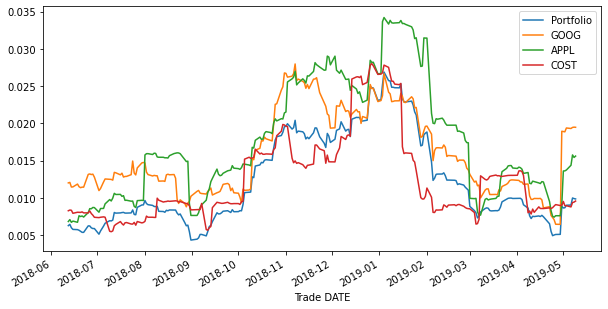

In [57]:
# Calculate rolling standard deviation
all_stocks_and_portfolio_rolling_std = all_stocks_and_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_stocks_and_portfolio_rolling_std.plot(figsize=(10,5))

### Calculate and plot the correlation

In [58]:
# Calculate and display correlation matrix
all_stocks_and_portfolio_corr = all_stocks_and_portfolio_returns.corr()
all_stocks_and_portfolio_corr

,Portfolio,GOOG,APPL,COST
Portfolio,1.000000,0.853984,0.881676,0.687446
GOOG,0.853984,1.000000,0.655007,0.385145
APPL,0.881676,0.655007,1.000000,0.413546
COST,0.687446,0.385145,0.413546,1.000000


<AxesSubplot:>

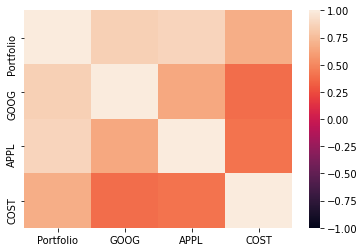

In [59]:
# Plot correlation
sns.heatmap(all_stocks_and_portfolio_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [60]:
# Calculate and plot Beta
# Include S&P 500 daily returns into the portfolio returns data frame
all_returns = pd.concat([all_stocks_and_portfolio_returns,sp500_daily_returns], axis='columns', join='inner')
all_returns.sort_index()
all_returns.head()

,Portfolio,GOOG,APPL,COST,SP500
2018-05-14,0.000015,0.001766,-0.002333,0.000613,0.000884
2018-05-15,-0.010064,-0.019060,-0.009088,-0.002042,-0.006842
2018-05-16,0.009403,0.002354,0.009333,0.016523,0.004061
2018-05-17,-0.001595,-0.002940,-0.006324,0.004479,-0.000856
2018-05-18,-0.006061,-0.011339,-0.003637,-0.003206,-0.002632


In [61]:
# Calculate 60-day rolloing covariances 
Goog_rolling_covariance = all_returns['GOOG'].rolling(window=60).cov(all_returns['SP500'])
Appl_rolling_covariance = all_returns['APPL'].rolling(window=60).cov(all_returns['SP500'])
Cost_rolling_covariance = all_returns['COST'].rolling(window=60).cov(all_returns['SP500'])
Portfolio_rolling_covariance = all_returns['Portfolio'].rolling(window=60).cov(all_returns['SP500'])

In [62]:
# Calculate 60-day rolling variance of S&P 500
SP500_rolling_variance = all_returns['SP500'].rolling(window=60).var()

In [63]:
# Calculate 60-day rolling beta
Goog_rolling_beta = Goog_rolling_covariance / SP500_rolling_variance
Appl_rolling_beta = Appl_rolling_covariance / SP500_rolling_variance
Cost_rolling_beta = Cost_rolling_covariance / SP500_rolling_variance
Portfolio_rolling_beta = Portfolio_rolling_covariance / SP500_rolling_variance

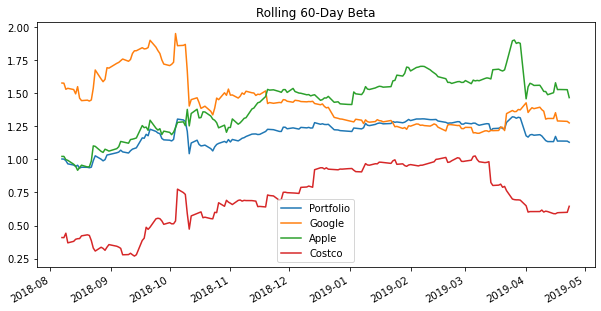

In [64]:
# Plot 60-day rolling beta
ax = Portfolio_rolling_beta.plot(figsize=(10,5), title='Rolling 60-Day Beta')
Goog_rolling_beta.plot(ax=ax)
Appl_rolling_beta.plot(ax=ax)
Cost_rolling_beta.plot(ax=ax)

ax.legend(['Portfolio','Google','Apple','Costco'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualzied Sharpe Ratios
# Risk free return rates are needed to compute Sharpe ratios. Concate "risk free rates" dataset  

all_returns_enriched = pd.concat([all_returns,risk_free_return_rates], axis='columns', join='inner')
all_returns_enriched.sort_index()
all_returns_enriched.head()

,Portfolio,GOOG,APPL,COST,SP500,rf_rate
2018-05-14,0.000015,0.001766,-0.002333,0.000613,0.000884,0.000211
2018-05-15,-0.010064,-0.019060,-0.009088,-0.002042,-0.006842,0.000210
2018-05-16,0.009403,0.002354,0.009333,0.016523,0.004061,0.000209
2018-05-17,-0.001595,-0.002940,-0.006324,0.004479,-0.000856,0.000209
2018-05-18,-0.006061,-0.011339,-0.003637,-0.003206,-0.002632,0.000208


In [66]:
# Calculate Sharpe ratios
all_sharpe_ratios = ((all_returns_enriched.mean() - all_returns_enriched['rf_rate'].mean()) * 252) / (all_returns_enriched.std() * np.sqrt(252))
all_sharpe_ratios

Portfolio    0.783932
GOOG         0.618827
APPL         0.483375
COST         0.919438
SP500        0.327737
rf_rate      0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

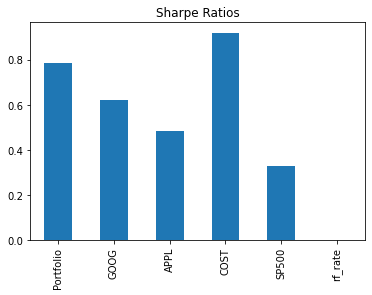

In [67]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Looking at the annualized returns, overall portfolio delivered delivered 21% annualized return.
Looking at Sharpe ratio, relative to the risk, portfolio outperformed S&P 500 
Among individual stocks, Costco outperfomed other two - Google and Apple, when it comes to return relative to risk.

Looking at 60-day rolling beta, overall portfolio has been moderately volatile in comparision to the overall market (S&P 500). Costco is the least volatile with annualized return of 20.9% and Apple is the most vilatile stock with 29.6% return. 

Looking at portfolio correlation, all 3 stocks are strongly correlated to the overall portfolio returns implying Apple, Google and Costco contributed well to the success of the portfolio with Apple being at the top. Google and Apple are strongly correlated at 65.5%, which makes sense because both are technology stock. 
Booth Google and Apple are weakly correlated to Costco (38% to 41%).
So, we have some diversification in the portfolio. However, concentration is more on technology sector and there is an opportunity of futher diversification.